### 1. Importing Libraries

---


In [1852]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno 

### 2. Reading the Data

---


In [1853]:
data = pd.read_csv('lending_club_loan_two.csv')

In [1854]:
data.shape

(396030, 27)

In [1855]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [1856]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [1857]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### 3. Exploratory Data Analysis

---


<AxesSubplot: >

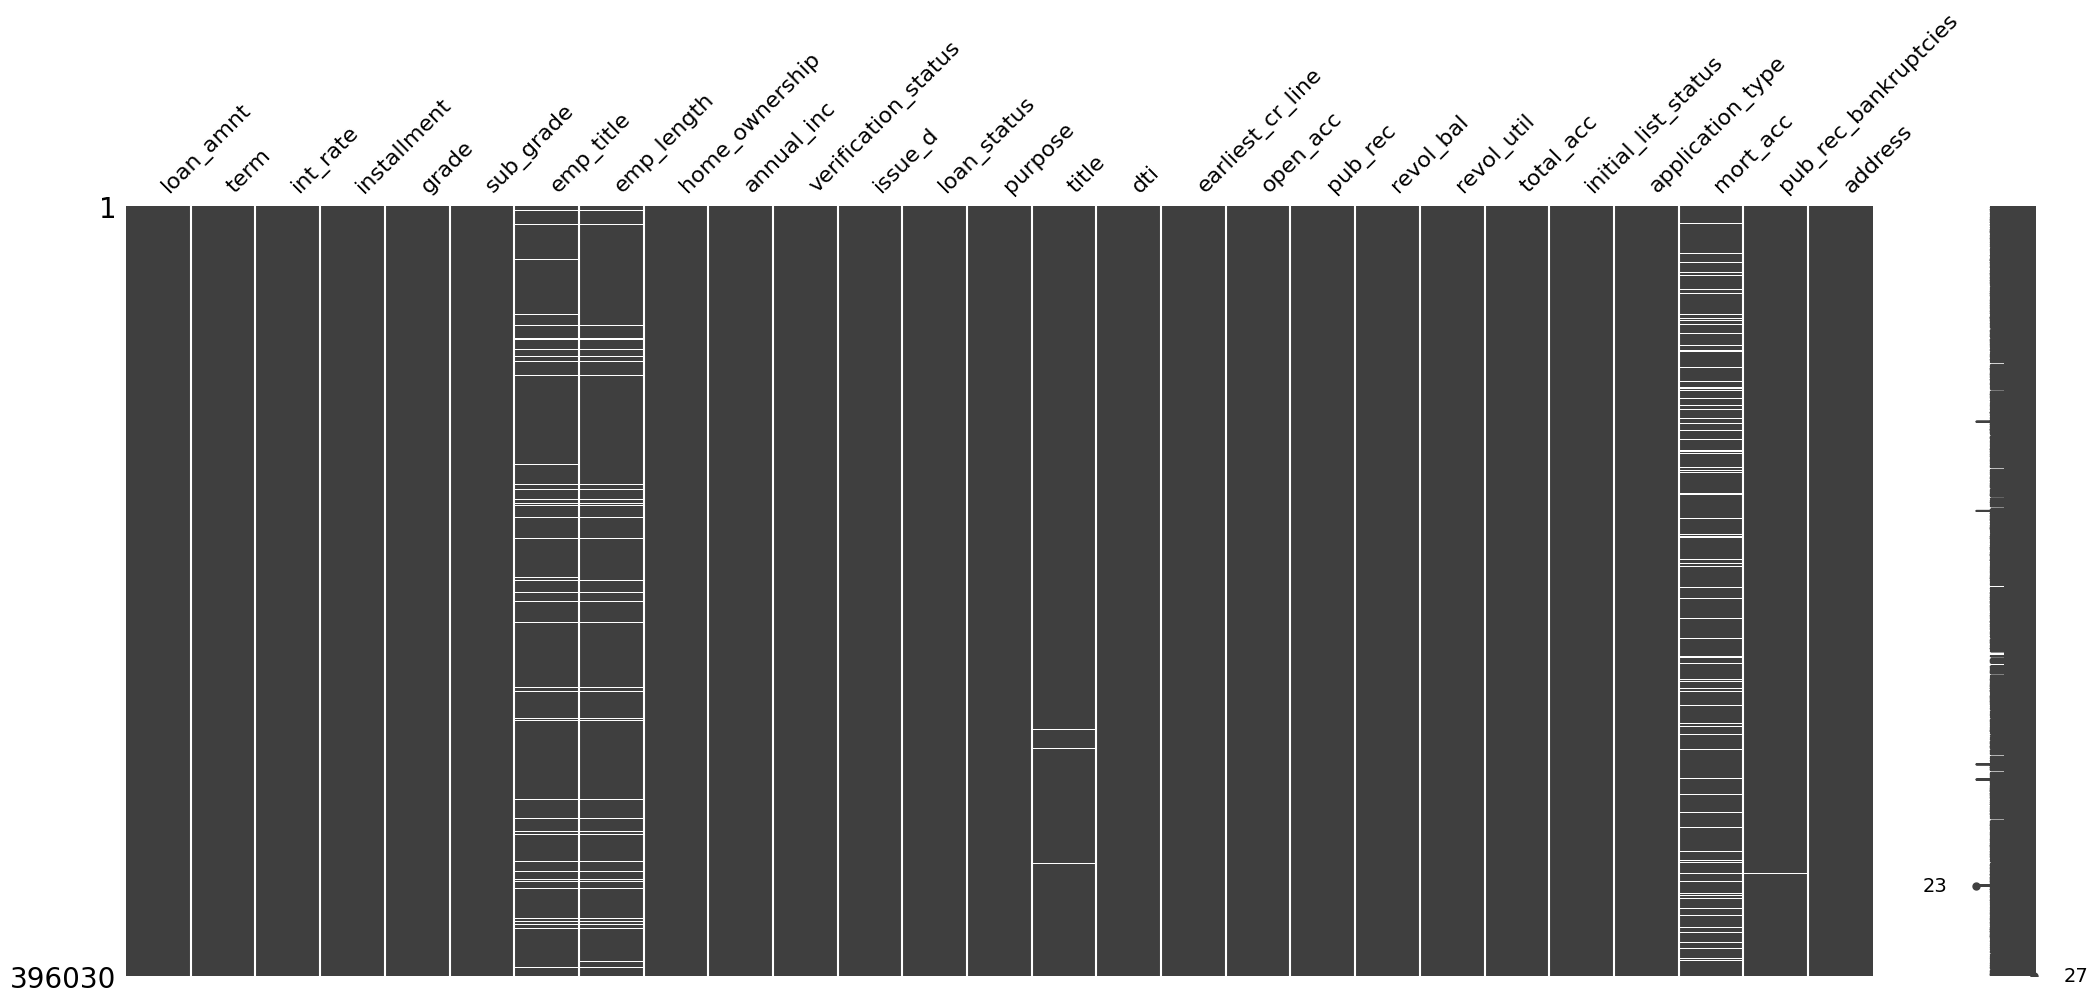

In [1858]:
missingno.matrix(data)

In [1859]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

<AxesSubplot: >

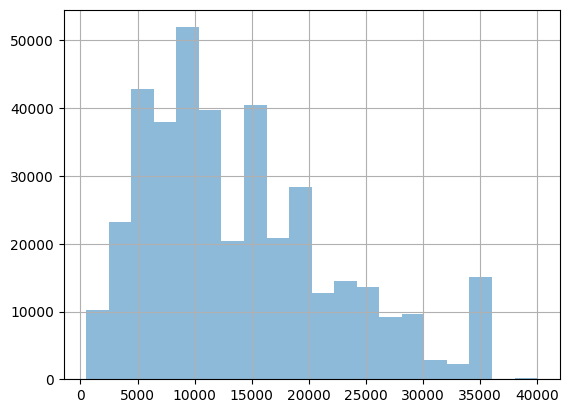

In [1860]:
data['loan_amnt'].hist(alpha = 0.5, bins = 20)


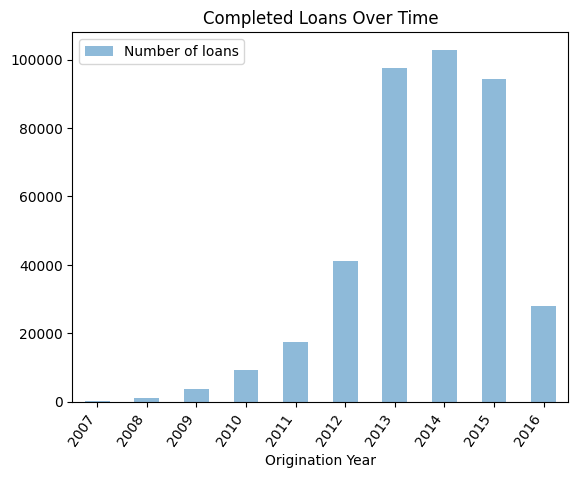

In [1861]:
data['issue_year'] = pd.to_datetime(data['issue_d']).dt.year
data.groupby('issue_year')['loan_amnt'].count().plot(kind='bar', title = 'Completed Loans Over Time', label = 'Number of loans', xlabel = 'Origination Year',alpha = 0.5)
plt.xticks(rotation=55, ha='right')
plt.legend()
plt.show()

In [1]:
data.groupby('purpose')['loan_amnt'].count().sort_values(ascending=False).plot(kind='bar',title = 'Top 10 Loan Types by Count', label = 'Number of loans', xlabel='Loan Type', width = .75,alpha = 0.5)
plt.xticks(rotation=55, ha='right')
plt.legend()
plt.show()
#Map

NameError: name 'data' is not defined

#### Loan Status v.s Loan_amount & installment


In [1863]:
loan_status_counts = data['loan_status'].value_counts()
loan_status_counts

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

<AxesSubplot: xlabel='loan_status', ylabel='count'>

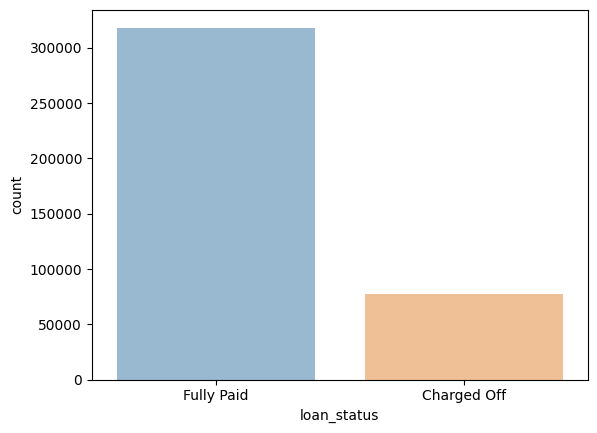

In [1864]:
sns.countplot(x='loan_status', data=data,alpha = 0.5)

In [1865]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [1866]:
data.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,452.703110,249.096609,21.62,274.86,399.06,585.67,1527.00
Fully Paid,318357.0,426.761866,250.861622,16.08,244.46,369.51,562.89,1533.81


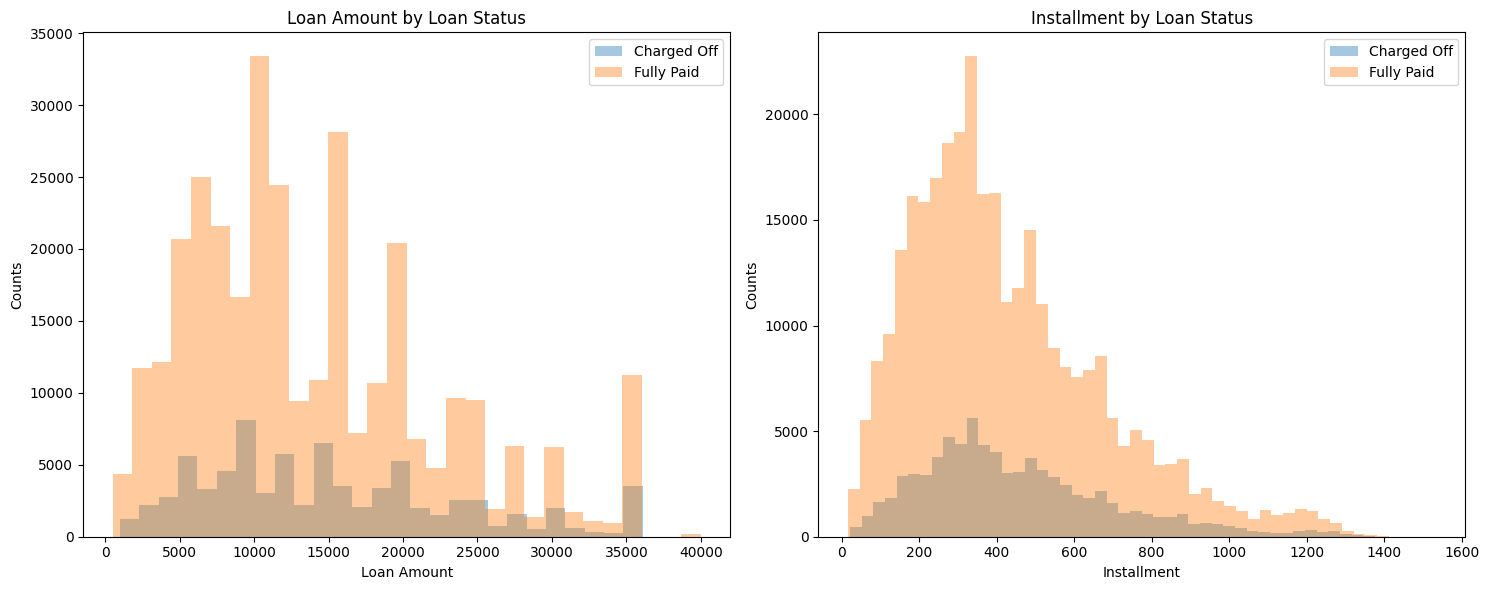

In [1867]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
for loan_status, loan_amnt_data in data.groupby('loan_status')['loan_amnt']:
    plt.hist(loan_amnt_data, bins=30, alpha=0.4, label=loan_status)
plt.title("Loan Amount by Loan Status")
plt.xlabel('Loan Amount')
plt.ylabel('Counts')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
for loan_status, installment_data in data.groupby('loan_status')['installment']:
    plt.hist(installment_data, bins=50, alpha=0.4, label=loan_status)
plt.title("Installment by Loan Status")
plt.xlabel('Installment')
plt.ylabel('Counts')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


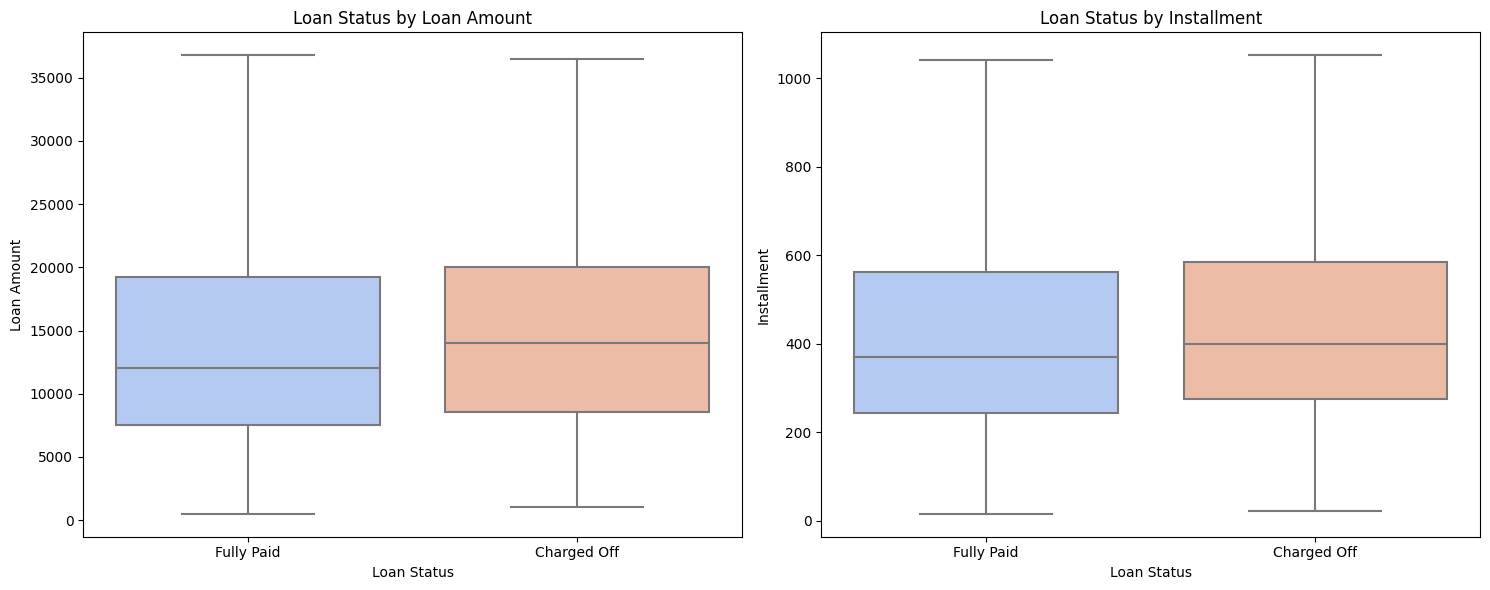

In [1868]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='loan_status', y='loan_amnt', data=data, palette='coolwarm', showfliers=False)
plt.title("Loan Status by Loan Amount")
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')

plt.subplot(1, 2, 2)
sns.boxplot(x='loan_status', y='installment', data=data, palette='coolwarm', showfliers=False)
plt.title("Loan Status by Installment")
plt.xlabel('Loan Status')
plt.ylabel('Installment')

plt.tight_layout() 
plt.show()


#### Loan_Status v.s Grade


In [1869]:
data['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [1870]:
data['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

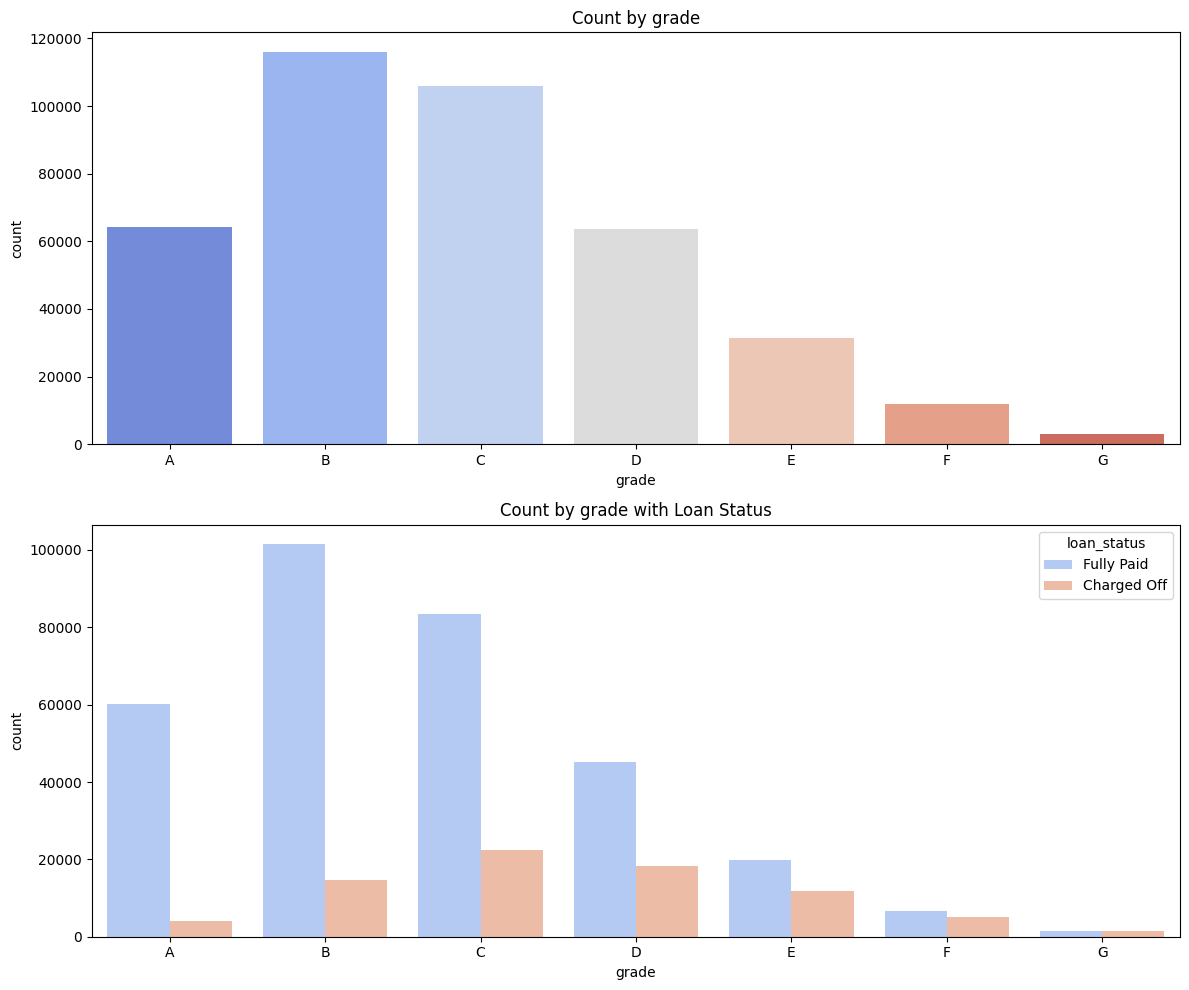

In [1871]:
grade_order = sorted(data['grade'].unique())

plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.countplot(x='grade',  data=data, order=grade_order,palette='coolwarm')
plt.title('Count by grade')

plt.subplot(2, 1, 2)
sns.countplot(x='grade', data=data, order=grade_order,palette='coolwarm', hue='loan_status')
plt.title('Count by grade with Loan Status')
plt.tight_layout()

plt.show()

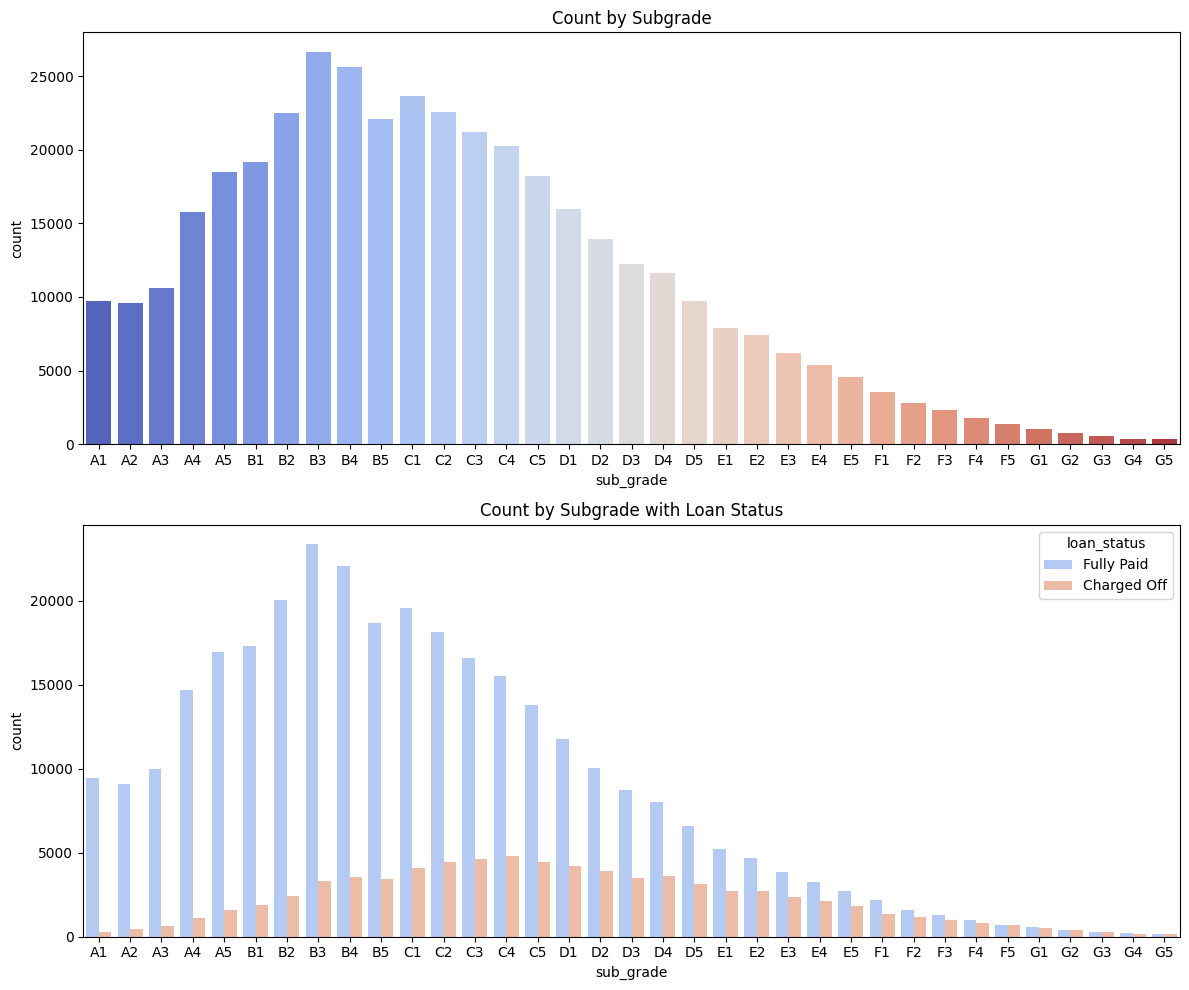

In [1872]:
import matplotlib.pyplot as plt
import seaborn as sns

subgrade_order = sorted(data['sub_grade'].unique())
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
sns.countplot(x='sub_grade', data=data, order=subgrade_order, palette='coolwarm')
plt.title('Count by Subgrade')

plt.subplot(2, 1, 2)
sns.countplot(x='sub_grade', data=data, order=subgrade_order, palette='coolwarm', hue='loan_status')
plt.title('Count by Subgrade with Loan Status')

plt.tight_layout()
plt.show()


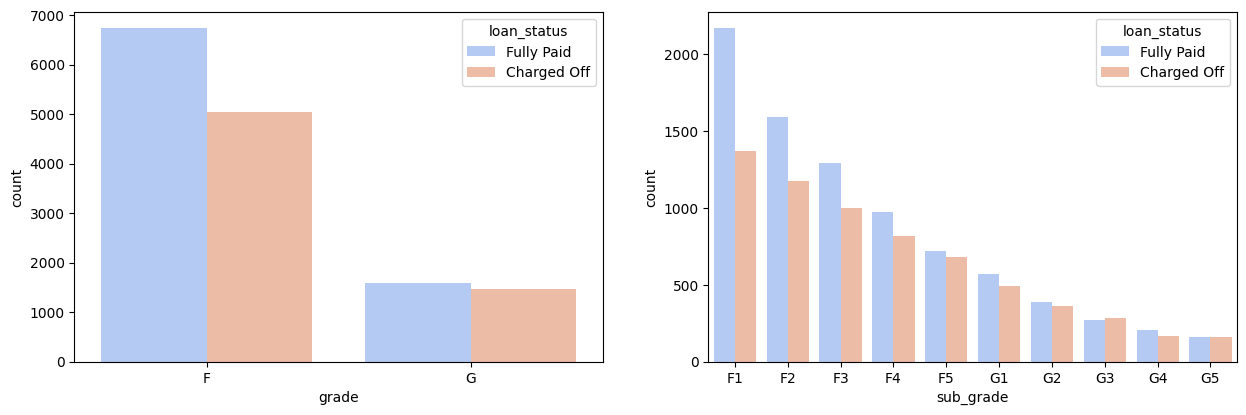

In [1873]:
import matplotlib.pyplot as plt
import seaborn as sns

df = data[(data.grade == 'F') | (data.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade, palette='coolwarm')

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade, palette='coolwarm')

plt.show()


#### Loan Status v.s Interest Rate & annual_inc


In [1874]:
data.groupby('loan_status')['int_rate'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15.882587,4.388135,5.32,12.99,15.61,18.64,30.99
Fully Paid,318357.0,13.092105,4.319105,5.32,9.91,12.99,15.61,30.99


In [1875]:
data.groupby('loan_status')['annual_inc'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,67535.537710,58303.457136,0.0,42000.00,59000.0,80000.0,8706582.0
Fully Paid,318357.0,75829.951566,62315.991907,600.0,46050.53,65000.0,90000.0,7600000.0


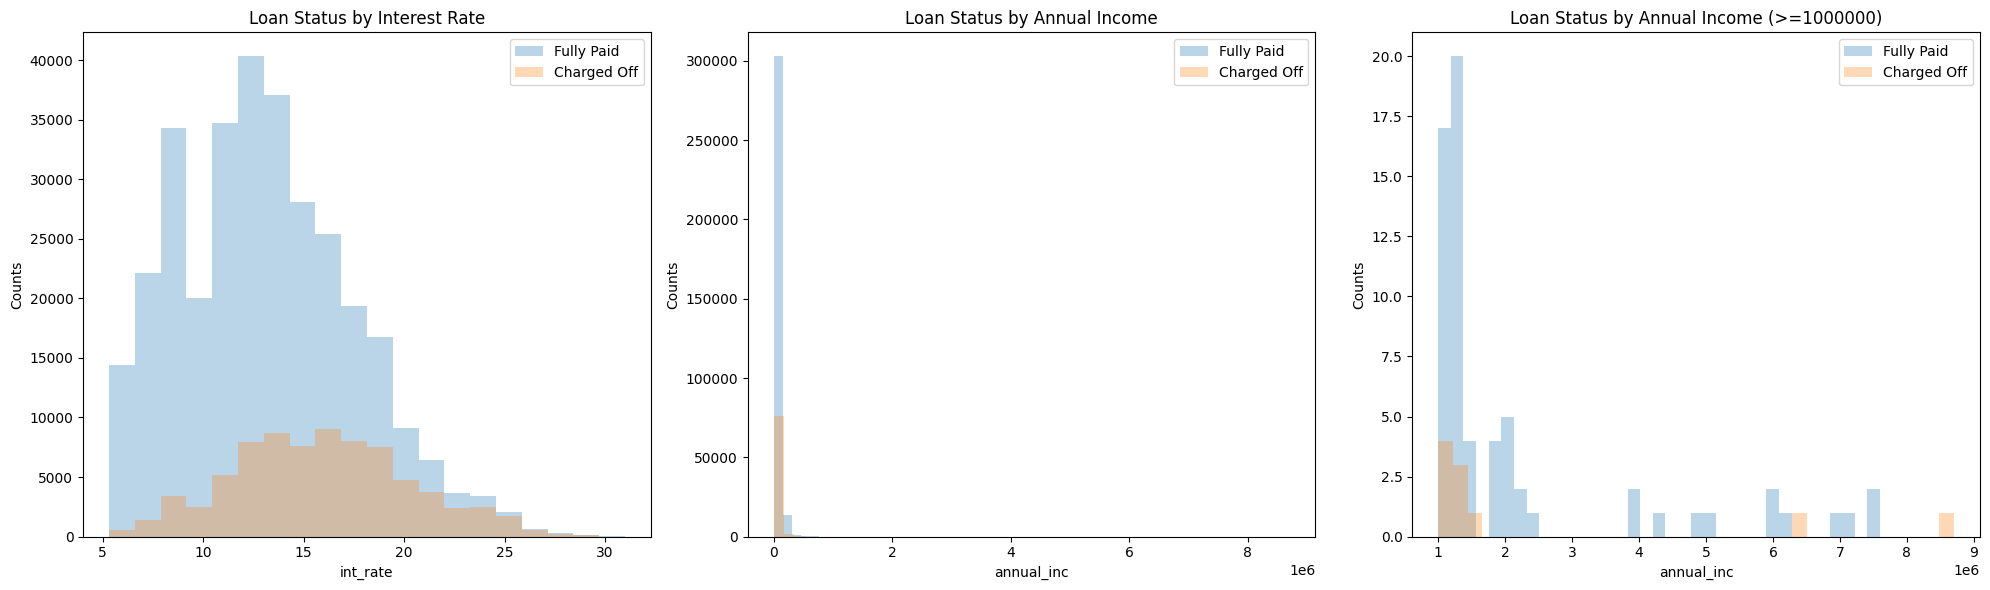

In [1876]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

for i in range(1, 4):
    plt.subplot(1, 3, i)
    title, xlabel, bins = None, None, None

    if i == 1:
        data_to_plot = data
        title = 'Loan Status by Interest Rate'
        xlabel = 'int_rate'
        bins = 20
    elif i == 2:
        data_to_plot = data
        title = 'Loan Status by Annual Income'
        xlabel = 'annual_inc'
        bins = 50
    else:
        data_to_plot = data[data['annual_inc'] >= 1000000]
        title = 'Loan Status by Annual Income (>=1000000)'
        xlabel = 'annual_inc'
        bins = 35

    for status in ['Fully Paid', 'Charged Off']:
        plt.hist(data_to_plot[data_to_plot['loan_status'] == status][xlabel], bins=bins, alpha=0.3, label=status)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Counts')
    plt.legend()

plt.tight_layout()
plt.show()


#### Loan Status v.s Term, Home Ownership, Veritication_status & Purpose


In [1877]:
data.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [1878]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [1879]:
data.home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [1880]:
data.verification_status.unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [1881]:
data.purpose.unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [1882]:
data.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

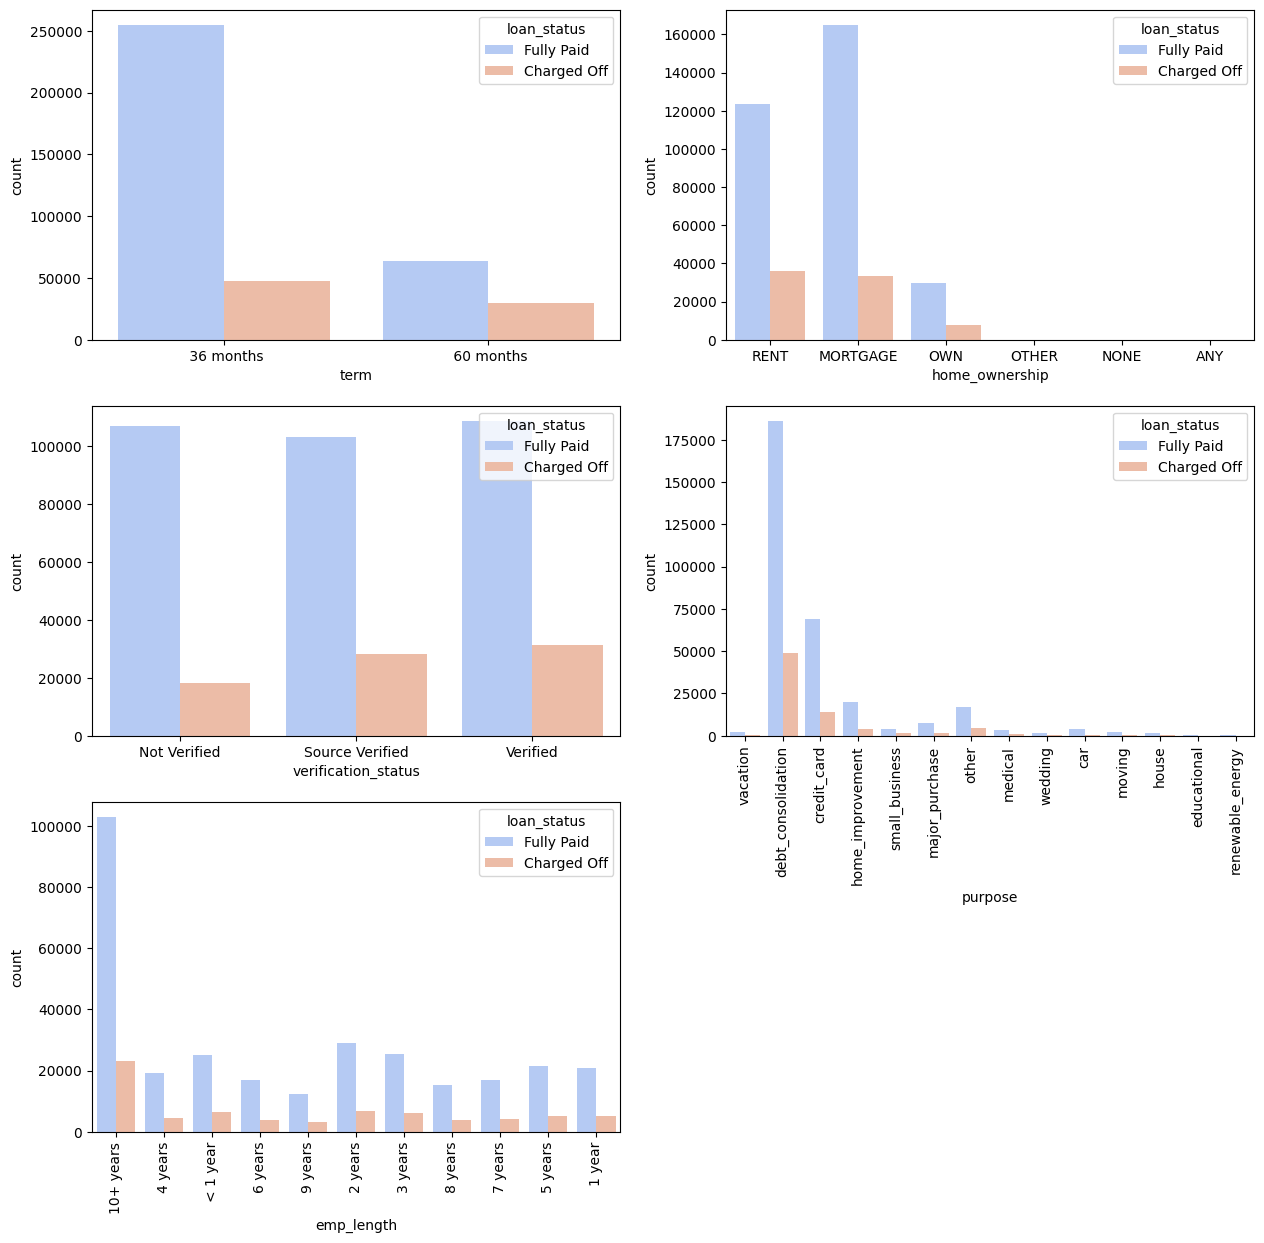

In [1883]:
plt.figure(figsize=(15,30))

plt.subplot(6,2,1)
sns.countplot(x='term',data=data,hue='loan_status',palette='coolwarm')

plt.subplot(6,2,2)
sns.countplot(x='home_ownership',data=data,hue='loan_status',palette='coolwarm')

plt.subplot(6,2,3)
sns.countplot(x='verification_status', data=data, hue='loan_status',palette='coolwarm')

plt.subplot(6,2,4)
g=sns.countplot(x='purpose', data=data, hue='loan_status',palette='coolwarm')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(6,2,5)
sns.countplot(data=data,x="emp_length",palette='coolwarm',hue='loan_status')
plt.xticks(rotation='vertical')
plt.show()


#### Correlation and Heat Map


In [1884]:
data.corr()

C:\Users\sjy99\AppData\Local\Temp\ipykernel_2008\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issue_year
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539,0.115067
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450,0.050386
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628,0.103490
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162,0.050033
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558,0.074847
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732,0.137584
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408,0.128452
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532,0.034400
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751,-0.053086
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035,0.111090


C:\Users\sjy99\AppData\Local\Temp\ipykernel_2008\2819186516.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


<AxesSubplot: >

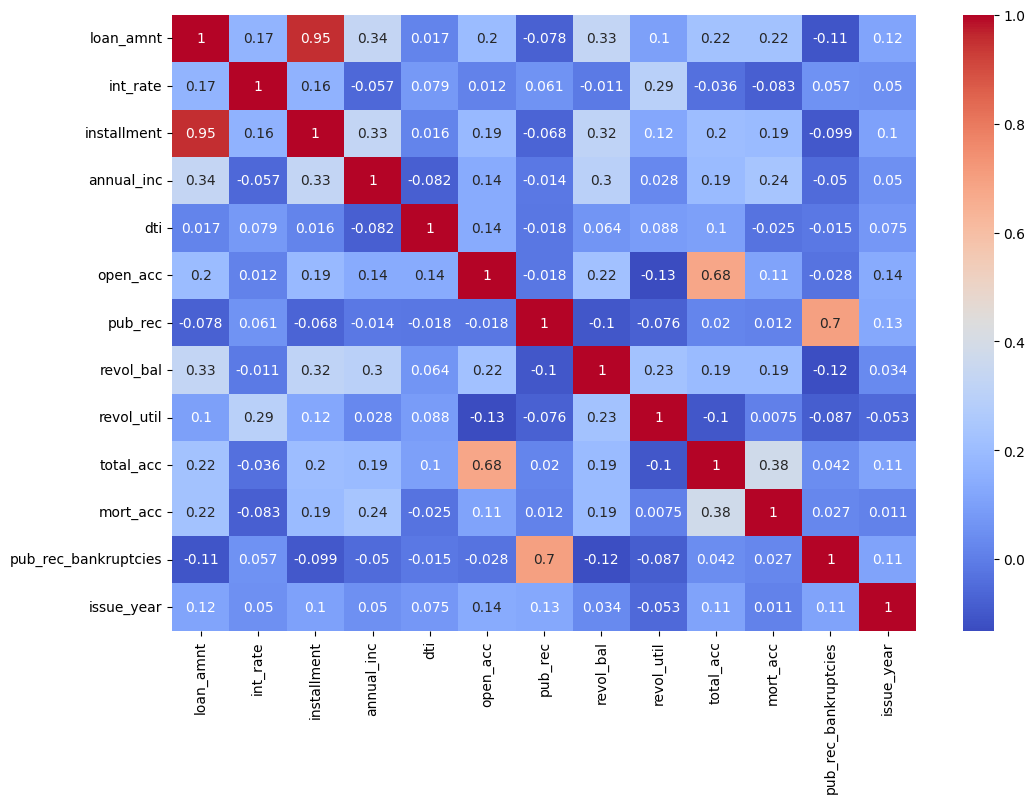

In [1885]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

### 4. Data Preprocessing

---


#### Feature Transformation by Data Type


In [1886]:
print([column for column in data.columns if data[column].dtype==object] )

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


In [1887]:
data.select_dtypes('object').nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              173105
emp_length                 11
home_ownership              6
verification_status         3
issue_d                   115
loan_status                 2
purpose                    14
title                   48817
earliest_cr_line          684
initial_list_status         2
application_type            3
address                393700
dtype: int64

emp_title & title

There are an overwhelming number of distinct job titles to attempt to convert into dummy variable features. Let's eliminate the 'emp_title' and 'title' columns


In [1888]:
data.drop('emp_title', axis=1, inplace=True)
data.drop('title', axis=1, inplace=True)

term & loan_status

Using the apply(), we can change it to numercial


In [1889]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [1890]:
data['term'] = data.term.map({' 36 months': 36, ' 60 months': 60})

In [1891]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [1892]:
data['loan_status'] = data['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

ealiest_cr_line & emp_length

Handling categorical string data that includes date/time/unique ID information using 'to_datetime' from Pandas and '.str.extract('(\d+)').astype('float')"


In [1893]:
data['earliest_cr_line'].value_counts()

Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [1894]:
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])
data['earliest_cr_line'] = data.earliest_cr_line.dt.year
data['emp_length'] = data['emp_length'].str.extract('(\d+)').astype(float)

issue_d

This would result in data leakage because, in theory, we wouldn't have an 'issue_date' since we wouldn't know beforehand whether or not a loan would be issued when using our model. Please drop this feature.


In [1895]:
data['issue_d'].value_counts()

Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
            ...  
Jul-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: issue_d, Length: 115, dtype: int64

In [1896]:
data.drop('issue_d', axis=1, inplace=True)

grade

We're utilizing Scikit-Learn's LabelEncoder to convert the 'grade' columns in the dataset into numerical values."


In [1897]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['grade'] = label_encoder.fit_transform(data['grade'])



Other Columns

Creating dummy variables for the following categorical features: 'subgrade','verification_status', 'purpose', 'initial_list_status', 'application_type', and 'home_ownership,' and dropping the first column for each feature to avoid multicollinearity


In [1898]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
data=pd.get_dummies(data, columns=dummies, drop_first= True)

adress

We are planning to create a 'zip_code' column by extracting zip codes from the address column in the dataset.


In [1899]:
data.drop('address',axis =1 , inplace=True)

In [1900]:
print([column for column in data.columns if data[column].dtype==object] )

[]


In [1901]:
data['pub_rec'] = data['pub_rec'].apply(lambda number: 0 if number == 0.0 else number)
data['mort_acc'] = data['mort_acc'].apply(lambda number: 0 if number == 0.0 else 1 if number >= 1.0 else number)
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].apply(lambda number: 0 if number == 0.0 else 1 if number >= 1.0 else number)


In [1902]:
data

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,earliest_cr_line,...,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,329.48,1,10.0,117000.0,1,26.24,1990,...,1,0,1,1,0,0,0,0,0,1
1,8000.0,36,11.99,265.68,1,4.0,65000.0,1,22.05,2004,...,0,0,0,1,0,1,0,0,0,0
2,15600.0,36,10.49,506.97,1,1.0,43057.0,1,12.79,2007,...,0,0,0,1,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,0,6.0,54000.0,1,2.60,2006,...,0,0,0,1,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,2,9.0,55000.0,0,33.95,1999,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,1,2.0,40000.0,1,15.63,2004,...,0,0,1,1,0,0,0,0,0,1
396026,21000.0,36,12.29,700.42,2,5.0,110000.0,1,21.45,2006,...,0,0,0,1,0,1,0,0,0,0
396027,5000.0,36,9.99,161.32,1,10.0,56500.0,1,17.56,1997,...,0,0,0,1,0,0,0,0,0,1
396028,21000.0,60,15.31,503.02,2,10.0,64000.0,1,15.88,1990,...,0,0,0,1,0,1,0,0,0,0


#### Find and Handel the Missing Value


In [1903]:
# Missing values
missing = data.isna().sum()
missing[missing>0].index

Index(['emp_length', 'revol_util', 'mort_acc', 'pub_rec_bankruptcies'], dtype='object')

In [1904]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100 
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_length': number of missing values '18301' ==> '4.621%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


Filling missing values in the 'emp_length' column with the mode value and filling missing values in the 'mort_acc' column by taking the mean within each 'total_acc' group, rounding to the nearest integer.


In [1905]:
data['emp_length'] = data['emp_length'].fillna(data['emp_length'].mode()[0])
data['mort_acc'].fillna(data.groupby('total_acc')['mort_acc'].transform('mean').round(), inplace=True)


Since the percentage of missing values in 'revol_util' and 'pub_re_bankruptcies' is less than 0.5%, we will remove the rows containing these missing values


In [1906]:
data.dropna(inplace=True)
data.isna().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
                          ..
home_ownership_MORTGAGE    0
home_ownership_NONE        0
home_ownership_OTHER       0
home_ownership_OWN         0
home_ownership_RENT        0
Length: 75, dtype: int64

In [1907]:
data.shape

(395219, 75)

### 5. Data Modeling

---


We will use the 'loan_status' as the predictive variable (feature) that represents the loan status


In [1908]:
y = data['loan_status'].copy()

"Our analysis goal is to predict 'good loans' among 'high-risk/high-interest loans':

We will filter the data to include only those records with the highest level of risk, which corresponds to the 'E:4' grade in the 'grade' column.
We will remove the 'int_rate' column, which is determined by the risk level."


In [1909]:
X_mod = data[data.grade == 4].copy()
X_mod = X_mod.drop(['loan_status','grade', 'int_rate'], axis=1, errors='ignore')
y_mod = y[X_mod.index]

First, we divide the data into training and testing sets. Subsequently, we further split the training data into training and validation data for modeling


In [1910]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_mod, y_mod, test_size=0.33, random_state=42, stratify=y_mod)

"XGBoost:

XGBoost, or Extreme Gradient Boosting, is another powerful machine learning algorithm known for its efficiency and effectiveness. It's particularly well-suited for both regression and classification problems. Here are some key advantages of XGBoost:

High Performance: XGBoost is designed for speed and efficiency, making it one of the top choices for large datasets. It implements a distributed and parallel computing framework that can take full advantage of multicore processors.

Regularization: XGBoost includes L1 (Lasso) and L2 (Ridge) regularization terms, which help prevent overfitting by adding penalties to the loss function.

Handling Missing Values: XGBoost can automatically handle missing values, reducing the need for data preprocessing.

Feature Importance: It provides valuable insights into feature importance, making it easier to understand the impact of different variables on the model's predictions.

Customizable: XGBoost offers a wide range of hyperparameters that can be fine-tuned to optimize model performance for specific tasks.

Ensemble Learning: XGBoost can be used as a base model for ensemble learning methods like stacking and blending, further enhancing predictive accuracy.

Both CatBoost and XGBoost are popular gradient boosting techniques, and the choice between them often depends on the specific characteristics of the dataset and the problem you're trying to solve."


In [1911]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21056, 72), (10371, 72), (21056,), (10371,))

Xgboost


In [1912]:
# HyperParameter

'''param_grid = dict(
     n_estimators=stats.randint(100, 1000),  # 예시 범위: 100부터 1000까지
     max_depth=stats.randint(3, 15),  # 예시 범위: 3부터 15까지
     learning_rate=stats.uniform(0.01, 0.3)  # 예시 범위: 0.01부터 0.3까지
 )

xgb_clf = XGBClassifier()
xgb_cv = RandomizedSearchCV(
     xgb_clf, param_grid, cv=3, n_iter=60, 
     scoring='roc_auc', n_jobs=-1 
 )
xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
best_params['tree_method'] = 'gpu_hist'
print(f"Best Parameters: {best_params}")

xgb = XGBClassifier(**best_params)
xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

'''

'param_grid = dict(\n     n_estimators=stats.randint(100, 1000),  # 예시 범위: 100부터 1000까지\n     max_depth=stats.randint(3, 15),  # 예시 범위: 3부터 15까지\n     learning_rate=stats.uniform(0.01, 0.3)  # 예시 범위: 0.01부터 0.3까지\n )\n\nxgb_clf = XGBClassifier()\nxgb_cv = RandomizedSearchCV(\n     xgb_clf, param_grid, cv=3, n_iter=60, \n     scoring=\'roc_auc\', n_jobs=-1 \n )\nxgb_cv.fit(X_train, y_train)\nbest_params = xgb_cv.best_params_\nbest_params[\'tree_method\'] = \'gpu_hist\'\nprint(f"Best Parameters: {best_params}")\n\nxgb = XGBClassifier(**best_params)\nxgb.fit(X_train, y_train)\n\ny_pred_train = xgb.predict(X_train)\ny_pred_test = xgb.predict(X_test)\n\n'

In [1913]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score , recall_score, confusion_matrix
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)



Model Performance:

We evaluate the model using Accuracy, Precision, and Recall.

- Accuracy: (Number of true predictions) / (Total number of data) → How accurately the model classifies data?
- Precision: (Number of data predicted as E and actually E) / (Number of data predicted as E) → How accurately the model identifies E? "Should not classify regular emails as spam.
- Recall: (Number of data predicted as E) / (Number of actual E data) → How accurately the model finds E? "In the case of actual cancer patients, it should always be predicted as positive.


Accuracy (test): 0.620
Precision (test): 0.662
Recall (test): 0.805


[Text(0, 0.5, 'Default'), Text(0, 1.5, 'Fully-Paid')]

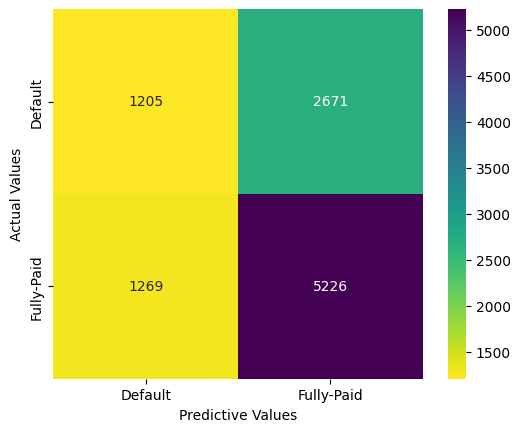

In [1914]:
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)
print(f'''Accuracy (test): {acc_test:.3f}
Precision (test): {prec_test:.3f}
Recall (test): {rec_test:.3f}''')


cm = confusion_matrix(y_test, y_pred_test)
ax=sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predictive Values')
ax.set_ylabel('Actual Values')
display_labels=['Default', 'Fully-Paid'] 
ax.set_xticklabels(display_labels)  # Add this line to set display labels
ax.set_yticklabels(display_labels)

Catboost


In [1915]:
'''Hyper Parameter
param_grid_catboost = dict(
     iterations=stats.randint(100, 1000),  # 예시 범위: 100부터 1000까지
     depth=stats.randint(3, 15),  # 예시 범위: 3부터 15까지
     learning_rate=stats.uniform(0.01, 0.3)  # 예시 범위: 0.01부터 0.3까지
 )

catboost_clf = CatBoostClassifier()
catboost_cv = RandomizedSearchCV(
     catboost_clf, param_grid_catboost, cv=3, n_iter=60, 
     scoring='roc_auc', n_jobs=-1, verbose=1
 )
catboost_cv.fit(X_train, y_train)
best_params_catboost = catboost_cv.best_params_
print(f"Best Parameters for CatBoost: {best_params_catboost}")

catboost_clf = CatBoostClassifier(**best_params_catboost)
catboost_clf.fit(X_train, y_train)

y_pred_catboost = catboost_clf.predict(X_train)
y_pred_catboost = catboost_clf.predict(X_test)


'''

'Hyper Parameter\nparam_grid_catboost = dict(\n     iterations=stats.randint(100, 1000),  # 예시 범위: 100부터 1000까지\n     depth=stats.randint(3, 15),  # 예시 범위: 3부터 15까지\n     learning_rate=stats.uniform(0.01, 0.3)  # 예시 범위: 0.01부터 0.3까지\n )\n\ncatboost_clf = CatBoostClassifier()\ncatboost_cv = RandomizedSearchCV(\n     catboost_clf, param_grid_catboost, cv=3, n_iter=60, \n     scoring=\'roc_auc\', n_jobs=-1, verbose=1\n )\ncatboost_cv.fit(X_train, y_train)\nbest_params_catboost = catboost_cv.best_params_\nprint(f"Best Parameters for CatBoost: {best_params_catboost}")\n\ncatboost_clf = CatBoostClassifier(**best_params_catboost)\ncatboost_clf.fit(X_train, y_train)\n\ny_pred_catboost = catboost_clf.predict(X_train)\ny_pred_catboost = catboost_clf.predict(X_test)\n\n\n'

Learning rate set to 0.037846


0:	learn: 0.6891841	total: 8.67ms	remaining: 8.66s
1:	learn: 0.6856712	total: 16.6ms	remaining: 8.28s
2:	learn: 0.6824441	total: 24.5ms	remaining: 8.16s
3:	learn: 0.6790384	total: 32.4ms	remaining: 8.06s
4:	learn: 0.6762450	total: 40.8ms	remaining: 8.12s
5:	learn: 0.6738480	total: 48.7ms	remaining: 8.06s
6:	learn: 0.6713453	total: 57.3ms	remaining: 8.13s
7:	learn: 0.6690584	total: 65ms	remaining: 8.05s
8:	learn: 0.6665564	total: 73.2ms	remaining: 8.06s
9:	learn: 0.6643719	total: 81.2ms	remaining: 8.03s
10:	learn: 0.6624944	total: 89ms	remaining: 8s
11:	learn: 0.6607112	total: 96ms	remaining: 7.91s
12:	learn: 0.6590470	total: 104ms	remaining: 7.88s
13:	learn: 0.6573319	total: 111ms	remaining: 7.84s
14:	learn: 0.6560886	total: 120ms	remaining: 7.86s
15:	learn: 0.6545794	total: 127ms	remaining: 7.81s
16:	learn: 0.6532706	total: 135ms	remaining: 7.79s
17:	learn: 0.6518695	total: 142ms	remaining: 7.77s
18:	learn: 0.6506503	total: 150ms	remaining: 7.74s
19:	learn: 0.6497971	total: 158ms	rema

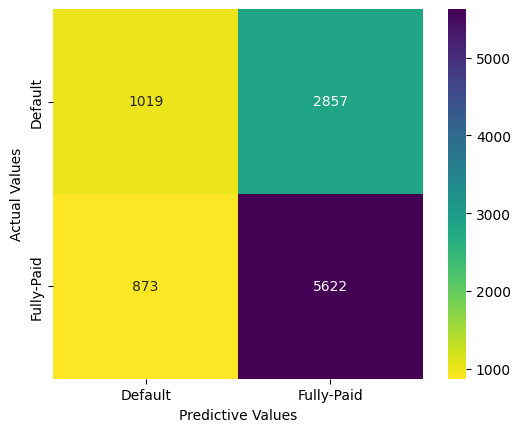

In [1916]:
from catboost import CatBoostClassifier

catboost_clf = CatBoostClassifier()

catboost_clf.fit(X_train, y_train)

y_pred_catboost = catboost_clf.predict(X_test)

acc_catboost = accuracy_score(y_test, y_pred_catboost)
prec_catboost = precision_score(y_test, y_pred_catboost)
rec_catboost = recall_score(y_test, y_pred_catboost)

print(f'''Accuracy (CatBoost): {acc_catboost:.3f}
Precision (CatBoost): {prec_catboost:.3f}
Recall (CatBoost): {rec_catboost:.3f}''')

cm_catboost = confusion_matrix(y_test, y_pred_catboost)

display_labels = ['Default', 'Fully-Paid']
ax = sns.heatmap(cm_catboost, cmap='viridis_r', annot=True, fmt='d', square=True)

# Set display labels for both x and y axes
ax.set_xticklabels(display_labels)
ax.set_yticklabels(display_labels)

ax.set_xlabel('Predictive Values')
ax.set_ylabel('Actual Values')

plt.show()

RandomForest


In [1917]:
'''
param_grid_rf = dict(
     n_estimators=stats.randint(100, 1000), 
     max_depth=stats.randint(3, 15),  
     min_samples_split=stats.randint(2, 20),  
     min_samples_leaf=stats.randint(1, 20) 
 )

rf_clf = RandomForestClassifier()
rf_cv = RandomizedSearchCV(
     rf_clf, param_grid_rf, cv=3, n_iter=60, 
     scoring='roc_auc', n_jobs=-1, verbose=1
 )
rf_cv.fit(X_train, y_train)
best_params_rf = rf_cv.best_params_
print(f"Best Parameters for Random Forest: {best_params_rf}")

rf = RandomForestClassifier(**best_params_rf)
rf.fit(X_train, y_train)

y_pred_train= rf.predict(X_train)
y_pred_test = rf.predict(X_test)

'''

'\nparam_grid_rf = dict(\n     n_estimators=stats.randint(100, 1000), \n     max_depth=stats.randint(3, 15),  \n     min_samples_split=stats.randint(2, 20),  \n     min_samples_leaf=stats.randint(1, 20) \n )\n\nrf_clf = RandomForestClassifier()\nrf_cv = RandomizedSearchCV(\n     rf_clf, param_grid_rf, cv=3, n_iter=60, \n     scoring=\'roc_auc\', n_jobs=-1, verbose=1\n )\nrf_cv.fit(X_train, y_train)\nbest_params_rf = rf_cv.best_params_\nprint(f"Best Parameters for Random Forest: {best_params_rf}")\n\nrf = RandomForestClassifier(**best_params_rf)\nrf.fit(X_train, y_train)\n\ny_pred_train= rf.predict(X_train)\ny_pred_test = rf.predict(X_test)\n\n'

In [1918]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)


Accuracy (test): 0.639
Precision (test): 0.657
Recall (test): 0.885


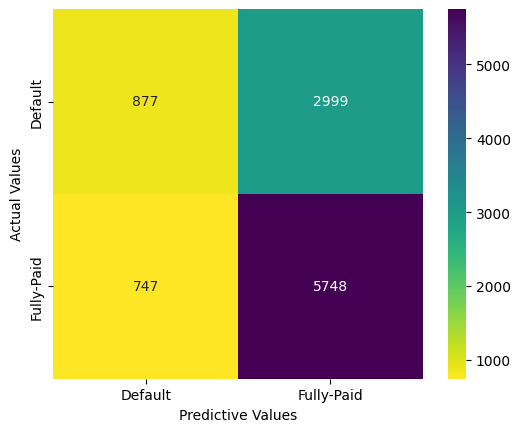

In [1919]:
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)
print(f'''Accuracy (test): {acc_test:.3f}
Precision (test): {prec_test:.3f}
Recall (test): {rec_test:.3f}''')

cm = confusion_matrix(y_test, y_pred_test)
ax = sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True)
ax.set_xlabel('Predictive Values')
ax.set_ylabel('Actual Values')
display_labels=['Default', 'Fully-Paid'] 
ax.set_xticklabels(display_labels)  # Add this line to set display labels
ax.set_yticklabels(display_labels)  # Add this line to set display labels
plt.show()
